# Getting started on Rhino

If you have been provided with an account on the Rhino computing cluster, these instructions will help you access and setup your account to the point where you can follow these bootcamp notes and perform analyses.

### Setting up your Rhino2 Account

1\. You can log in to Rhino2 in a terminal window by using any ssh client
to ssh into rhino as follows, replacing the "username" with your username:

    ssh username@rhino2.psych.upenn.edu

and then typing your temporary password when prompted. Once successfully
connected, type:

    passwd

to change your password to something only you know. Please do this as soon as
you have the time!

(As a general tip to Windows users without access to Terminal, we recommend
using Cygwin <https://www.cygwin.com/> or the Ubuntu subsystem
<https://docs.microsoft.com/en-us/windows/wsl/install-win10>)

2\. Once you have your password set up, check to be sure you can log in to
JupyterLab, where you'll be doing most of the bootcamp work. If you are
connected to the internet on UPenn's campus, you only need to go to
[https://rhino2.psych.upenn.edu:8200](https://rhino2.psych.upenn.edu:8200/) to
access JupyterLab. If you are connecting remotely, follow the rest of this
step. In a terminal where ssh is accessible, replace the "username" with your
username, and type:

    ssh -L8000:rhino2.psych.upenn.edu:8200 username@rhino2.psych.upenn.edu

followed by entering your rhino password. In your web browser, navigate to:

[https://127.0.0.1:8000](https://127.0.0.1:8000)

and you should see the JupyterLab interface pop up!

### Installing CMLReader

From within JupyterLab, click File, New, Terminal. (Alternatively, you
can use any ssh client to do these steps.) Then enter the following
commands:

    conda create -y -n environmentname python=3.7
    source activate environmentname
    conda install -c pennmem cmlreaders

### Setting up JupyterLab

Next, you'll need to install a suite of tools for EEG analysis. First,
install MNE by typing the following (be sure you're in the Anaconda
"environment" you just created in Step 1, by typing "source activate
environmentname"). Note that this may take a while, because MNE has a
lot of dependencies:

    conda install -c conda-forge mne

Next, install PTSA, which is another set of EEG tools developed by
former lab members:

    conda install -c pennmem ptsa

Finally, you'll need to link JupyterLab with your specific Python
installation. While still logged in to your rhino account and in your
Anaconda "environment", type:

    conda install ipykernel

and once that's done:

    python -m ipykernel install --user --name environmentname --display-name "environmentname"

You should be all set! Next time you log in to your JupyterLab account,
you should see an option to launch a new notebook with "environmentname"
as your Python environment. If you've been logged in to JupyterLab this
whole time, you may need to log out and log back in again to see this
change take effect.

### Getting the PythonBootcamp JupyterLab notes

Open a terminal inside JupyterLab, or by ssh, and type:

    git clone 'https://github.com/pennmem/PythonBootcamp'

### Learning how to use the tools and perform analyses

In JupyterLab, navigate to the lecture notes you downloaded using
the file browser section on the left, open the lecture notes, and
proceed through them in order. If appropriate for your background and
situation, jump ahead to the relevant sections to see syntax examples
for common analyses and for using the common tools used by the
Computational Memory Lab.

## Explore the RAM database on the Rhino cluster

### Jupyter Notebooks on Rhino
The Jupyter Notebook (and Jupyter Lab) is a powerful interface to IPython for data science. The notebook structure keeps figures and outputs organized with their generating code, and supports integration with text and images. This lets data scientists (like you!) keep a full log of everything that went into an analysis or manuscript. The cell-based structure of Jupyter Notebooks -- as you'll see soon -- makes it easy to tweak analyses without needing to re-run your whole pipeline, saving lots of time.

In the Computational Memory Lab, we run Jupyter Notebooks on a server (Rhino2), letting you access your analyses from anywhere (see referenced tutorial). This also makes it easy to load large amounts of EEG data and run parallel processes. But if you'd like, feel free to install Jupyter Notebooks on your computer and run them locally (Jupyter Lab comes with all default Anaconda installations).

Jupyter Notebooks can do some amazing things, but we don't have the time to discuss them all. Check out this list for some inspiration: https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/

### Accessing CML data

The CML's database of intracranial and scalp EEG comes in a pandas dataframe format. All the pertinent data about each experimental session is recorded in a row of a large dataframe. These databases are organized around experimental protocols. For example, the <b>'r1'</b> database contains all DARPA RAM data, while the **'pyfr'** database includes all free-recall intracranial data collected in the years prior to RAM. 

Let's load the RAM database to get a better sense of these formats. We're going to use **CMLReaders**, which is a custom library with helper functions to load data for any experiments run by the CML. If you don't already have CMLReaders installed, please follow the instructions here: https://github.com/pennmem/cmlreaders

In [166]:
#First, our import statements. The CMLReader class is your gateway to all experimental data, including electrodes and EEG. The get_data_index function specifically loads experimental databases. 
from cmlreaders import CMLReader, get_data_index

#The "r1" database corresponds to all of the RAM subjects. Use "pyfr" for the pre-RAM iEEG data.
df = get_data_index("r1")

In [53]:
#This dataframe contains all the information about every experimental sessions collected in the RAM project
df[:10]

,Recognition,all_events,contacts,experiment,import_type,localization,math_events,montage,original_experiment,original_session,pairs,ps4_events,session,subject,subject_alias,system_version,task_events
0,NaN,protocols/r1/subjects/R1001P/experiments/FR1/s...,protocols/r1/subjects/R1001P/localizations/0/m...,FR1,build,0,protocols/r1/subjects/R1001P/experiments/FR1/s...,0,NaN,0,protocols/r1/subjects/R1001P/localizations/0/m...,NaN,0,R1001P,R1001P,NaN,protocols/r1/subjects/R1001P/experiments/FR1/s...
1,NaN,protocols/r1/subjects/R1001P/experiments/FR1/s...,protocols/r1/subjects/R1001P/localizations/0/m...,FR1,build,0,protocols/r1/subjects/R1001P/experiments/FR1/s...,0,NaN,1,protocols/r1/subjects/R1001P/localizations/0/m...,NaN,1,R1001P,R1001P,NaN,protocols/r1/subjects/R1001P/experiments/FR1/s...
2,NaN,protocols/r1/subjects/R1001P/experiments/FR2/s...,protocols/r1/subjects/R1001P/localizations/0/m...,FR2,build,0,protocols/r1/subjects/R1001P/experiments/FR2/s...,0,NaN,0,protocols/r1/subjects/R1001P/localizations/0/m...,NaN,0,R1001P,R1001P,NaN,protocols/r1/subjects/R1001P/experiments/FR2/s...
3,NaN,protocols/r1/subjects/R1001P/experiments/FR2/s...,protocols/r1/subjects/R1001P/localizations/0/m...,FR2,build,0,protocols/r1/subjects/R1001P/experiments/FR2/s...,0,NaN,1,protocols/r1/subjects/R1001P/localizations/0/m...,NaN,1,R1001P,R1001P,NaN,protocols/r1/subjects/R1001P/experiments/FR2/s...
4,NaN,protocols/r1/subjects/R1001P/experiments/PAL1/...,protocols/r1/subjects/R1001P/localizations/0/m...,PAL1,build,0,protocols/r1/subjects/R1001P/experiments/PAL1/...,0,NaN,0,protocols/r1/subjects/R1001P/localizations/0/m...,NaN,0,R1001P,R1001P,NaN,protocols/r1/subjects/R1001P/experiments/PAL1/...
5,NaN,protocols/r1/subjects/R1001P/experiments/PAL1/...,protocols/r1/subjects/R1001P/localizations/0/m...,PAL1,build,0,protocols/r1/subjects/R1001P/experiments/PAL1/...,0,NaN,1,protocols/r1/subjects/R1001P/localizations/0/m...,NaN,1,R1001P,R1001P,NaN,protocols/r1/subjects/R1001P/experiments/PAL1/...
6,NaN,NaN,protocols/r1/subjects/R1001P/localizations/0/m...,YC1,conversion,0,NaN,0,NaN,0,protocols/r1/subjects/R1001P/localizations/0/m...,NaN,0,R1001P,R1001P,NaN,protocols/r1/subjects/R1001P/experiments/YC1/s...
7,NaN,NaN,protocols/r1/subjects/R1001P/localizations/0/m...,YC1,conversion,0,NaN,0,NaN,1,protocols/r1/subjects/R1001P/localizations/0/m...,NaN,1,R1001P,R1001P,NaN,protocols/r1/subjects/R1001P/experiments/YC1/s...
8,NaN,NaN,protocols/r1/subjects/R1001P/localizations/0/m...,YC1,conversion,0,NaN,0,NaN,2,protocols/r1/subjects/R1001P/localizations/0/m...,NaN,2,R1001P,R1001P,NaN,protocols/r1/subjects/R1001P/experiments/YC1/s...
9,NaN,protocols/r1/subjects/R1002P/experiments/FR1/s...,protocols/r1/subjects/R1002P/localizations/0/m...,FR1,build,0,protocols/r1/subjects/R1002P/experiments/FR1/s...,0,NaN,0,protocols/r1/subjects/R1002P/localizations/0/m...,NaN,0,R1002P,R1002P,NaN,protocols/r1/subjects/R1002P/experiments/FR1/s...


In [11]:
#Let's see what experiments we have access to
df['experiment'].unique()

array(['FR1', 'FR2', 'PAL1', 'YC1', 'PAL2', 'catFR1', 'YC2', 'catFR2',
       'PS1', 'PS3', 'PS2', 'TH1', 'FR3', 'PS2.1', 'PAL3', 'TH3',
       'catFR3', 'FR5', 'PS4_catFR', 'THR', 'PS4_FR', 'PAL5', 'THR1',
       'catFR5', 'FR6', 'PS5_catFR', 'catFR6', 'TICL_FR',
       'LocationSearch', 'TICL_catFR', 'PS4_catFR5'], dtype=object)

**Exercise: How many RAM sessions were run on Jefferson subjects?**

In [156]:
np.sum(df['subject'].str.endswith('J'))

414

### Verbal free-recall tasks (no-stim)
* FR1
* catFR1

### Paired-associates tasks
* PAL1
* PAL2 (open-loop stim)
* PAL3 (closed-loop stim)
* PAL5 (closed-loop stim)

### Spatial navigation tasks
* YC1
* TH1
* THR
* THR1
* YC2 (open-loop stim)
* TH3 (closed-loop stim)

### Verbal free-recall w/ stim
(Basically, any FR task with a number above 1 somewhere)
* FR2 (open-loop)
* catFR2
* FR3 (closed-loop)
* catFR3
* FR5 (closed-loop)
* catFR5
* PS4_FR (closed-loop)
* PS4_catFR (closed-loop)
* PS5_catFR (closed-loop)
* FR6 (multi-target stim)
* catFR6 (multi-target stim)
* TICL_FR (encoding/math/retrieval stim)

### No-task stimulation ("parameter search")
* PS1
* PS2/PS2.1
* PS3
* LocationSearch


In [30]:
#And now let's find all the subjects who did the FR1 task
fr1_df = df.query('experiment == "FR1"')
fr1_df['subject'].unique()

array(['R1001P', 'R1002P', 'R1003P', 'R1006P', 'R1010J', 'R1015J',
       'R1018P', 'R1020J', 'R1022J', 'R1023J', 'R1026D', 'R1027J',
       'R1030J', 'R1031M', 'R1032D', 'R1033D', 'R1034D', 'R1035M',
       'R1036M', 'R1039M', 'R1042M', 'R1044J', 'R1045E', 'R1048E',
       'R1049J', 'R1050M', 'R1051J', 'R1052E', 'R1053M', 'R1054J',
       'R1056M', 'R1057E', 'R1059J', 'R1060M', 'R1061T', 'R1062J',
       'R1063C', 'R1065J', 'R1066P', 'R1067P', 'R1068J', 'R1069M',
       'R1070T', 'R1074M', 'R1075J', 'R1076D', 'R1077T', 'R1080E',
       'R1081J', 'R1083J', 'R1084T', 'R1086M', 'R1089P', 'R1092J',
       'R1093J', 'R1094T', 'R1096E', 'R1098D', 'R1100D', 'R1101T',
       'R1102P', 'R1104D', 'R1105E', 'R1106M', 'R1108J', 'R1111M',
       'R1112M', 'R1113T', 'R1114C', 'R1115T', 'R1118N', 'R1120E',
       'R1121M', 'R1122E', 'R1123C', 'R1124J', 'R1125T', 'R1127P',
       'R1128E', 'R1129D', 'R1130M', 'R1131M', 'R1134T', 'R1135E',
       'R1136N', 'R1137E', 'R1138T', 'R1142N', 'R1145J', 'R114

### Load data from an example subject
Here, let's go through an example of loading experimental events and EEG from one subject

In [17]:
#First, our import statements
from cmlreaders import CMLReader, get_data_index

#The "r1" database corresponds to all of the RAM subjects
df = get_data_index("r1")

#Specify which subject and experiment we want
sub = 'R1001P'
exp = 'FR1'

#Find out the sessions, localization, and montage for this subject
sessions = list(df[(df['subject']==sub) & (df['experiment']==exp)]['session'])
mont = int(df[(df['subject']==sub) & (df['experiment']==exp)].iloc()[0]['montage'])      #note that *usually* mont and loc will be 0.
loc = int(df[(df['subject']==sub) & (df['experiment']==exp)].iloc()[0]['localization'])

In [18]:
print(sub+' sessions: '+str(sessions))
print(sub+' montage: '+str(mont))
print(sub+' localization: '+str(loc))

R1001P sessions: [0, 1]
R1001P montage: 0
R1001P localization: 0


<i>Usually, montage and localization are both zero, meaning a subject had only one surgery and the subset of recorded electrodes did not change. But not always!</i>

<b>Montage:</b> Refers to set of a subject's electrodes that were recorded in a given experimental session.

<b>Localization:</b> A subject will get a new localization if they were reimplanted after another surgery. Therefore, electrodes may be in different places altogether. 

This subject completed two sessions of FR1, and only had one montage/localization. Let's load data from the first session. First, we'll need to instantiate an instance of the 'CMLReader' object, which is the object class for accessing any CML data. Think of it as a "finder" for any kind of experimental data. At a minimum, you'll need to give it a subject and experiment for it to find anything.

In [52]:
#For first session...
reader = CMLReader(sub, exp, sessions[0], montage=mont, localization=loc)   #reader for loading CML data

#What kind of data can the reader get for us?
reader.reader_names.keys()

dict_keys(['voxel_coordinates', 'jacksheet', 'classifier_excluded_leads', 'good_leads', 'leads', 'area', 'electrode_coordinates', 'prior_stim_results', 'target_selection_table', 'experiment_log', 'all_events', 'events', 'math_events', 'ps4_events', 'task_events', 'used_classifier', 'baseline_classifier', 'sources', 'eeg', 'matlab_contacts', 'matlab_pairs', 'pairs', 'contacts', 'localization', 'electrode_categories', 'classifier_summary', 'session_summary', 'math_summary'])

Many of these readers aren't necessary for day-to-day analyses. We'll focus on how to reader experimental events, electrode information, and EEG. 

#### Load experimental events

In [59]:
evs = reader.load('task_events')  #'events' will also do, but you'll get some extra stuff

The events dataframe contains information about everything that happened during an experimental session. It indicates the time at which every word appeared on the screen, and when those words were later recalled. It also contains information about events that you might not care about, such as when the countdown timer starts and ends.
<center>
<img src="https://github.com/esolomon/PythonBootcamp2019/blob/master/figures/task_design-01.jpg?raw=true" width=650>
</center>
Let's take a look at all the columns in this dataframe.

In [60]:
evs.columns

Index(['eegoffset', 'eegfile', 'exp_version', 'experiment', 'intrusion',
       'is_stim', 'item_name', 'item_num', 'list', 'montage', 'msoffset',
       'mstime', 'protocol', 'recalled', 'rectime', 'serialpos', 'session',
       'stim_list', 'stim_params', 'subject', 'type'],
      dtype='object')

* 'eegoffset' indicates where (in samples) in the EEG file this event occurred. CMLReaders needs this info, but usually you won't need to deal with it directly.
* 'eegfile' is the path to the corresponding file where raw EEG is saved.
* 'experiment' is the behavioral task we're looking at. 
* 'intrusion' is an indicator of intrusion events during the recall period. -1 indicates an extra-list intrusion, otherwise, it's the list number from which the word came.
* 'is_stim' flags whether stimulation occurred during this event. We won't be dealing with stimulation data in this bootcamp. 
* <b>'item_name'</b> is the word that was presented or recalled.
* 'item_num' is the index for this word in the word pool. 
* 'list' is the list number. 
* 'montage' is the subject montage, which you loaded earlier.
* 'mstime' is a time indicator, in ms. Good for comparing between events, but the absolute value is meaningless. 
* <b>'recalled'</b> is a indicator of whether an encoding word was later recalled successfully.
* 'rectime' is the time, in ms, when a word was recalled relative to the start of the recall period for that list.
* <b>'serialpos'</b> is the serial position of a presented/recalled word
* 'stim_list' is an indicator of whether stimulation was active during this list. 
* 'stim_params' is a dictionary of stimulation parameters.
* 'subject' is the subject you're analyzing!
* <b>'type'</b> is the type of event, e.g. 'WORD' or 'REC_WORD'

Please see https://pennmem.github.io/cmlreaders/html/events.html for even more information!

Say we're just interested in analyzing word encoding events. To filter by event type, use handy pandas functionality:

In [169]:
pd.set_option('display.max_columns', 100)  #an optional command that lets us view the full dataframe within Jupyter notebooks

In [170]:
word_evs = evs[evs['type']=='WORD']
word_evs[:10]

,eegoffset,eegfile,exp_version,experiment,intrusion,is_stim,item_name,item_num,list,montage,msoffset,mstime,protocol,recalled,rectime,serialpos,session,stim_list,stim_params,subject,type
23,388959,R1001P_FR1_0_12Oct14_1034,1.02,FR1,-999,False,HOUSE,130,1,0,1,1413125314490,r1,False,-999,1,0,False,[],R1001P,WORD
24,390268,R1001P_FR1_0_12Oct14_1034,1.02,FR1,-999,False,HAWK,120,1,0,1,1413125317107,r1,False,-999,2,0,False,[],R1001P,WORD
25,391560,R1001P_FR1_0_12Oct14_1034,1.02,FR1,-999,False,WAND,288,1,0,1,1413125319691,r1,False,-999,3,0,False,[],R1001P,WORD
26,392785,R1001P_FR1_0_12Oct14_1034,1.02,FR1,-999,False,GEESE,110,1,0,1,1413125322141,r1,False,-999,4,0,False,[],R1001P,WORD
27,394019,R1001P_FR1_0_12Oct14_1034,1.02,FR1,-999,False,STAR,247,1,0,1,1413125324609,r1,False,-999,5,0,False,[],R1001P,WORD
28,395285,R1001P_FR1_0_12Oct14_1034,1.02,FR1,-999,False,CLOUD,58,1,0,1,1413125327142,r1,False,-999,6,0,False,[],R1001P,WORD
29,396544,R1001P_FR1_0_12Oct14_1034,1.02,FR1,-999,False,PEARL,178,1,0,1,1413125329660,r1,False,-999,7,0,False,[],R1001P,WORD
30,397769,R1001P_FR1_0_12Oct14_1034,1.02,FR1,-999,False,SWORD,263,1,0,1,1413125332110,r1,False,-999,8,0,False,[],R1001P,WORD
31,399036,R1001P_FR1_0_12Oct14_1034,1.02,FR1,-999,False,STAIR,246,1,0,1,1413125334644,r1,False,-999,9,0,False,[],R1001P,WORD
32,400236,R1001P_FR1_0_12Oct14_1034,1.02,FR1,-999,False,GOLD,114,1,0,1,1413125337044,r1,False,-999,10,0,False,[],R1001P,WORD


Applying these kinds of filters are useful if you're only interested in analyzing one kind of event. For instance, we could also just find recall events:

In [171]:
rec_evs = evs[evs['type']=='REC_WORD']
rec_evs[:10]

,eegoffset,eegfile,exp_version,experiment,intrusion,is_stim,item_name,item_num,list,montage,msoffset,mstime,protocol,recalled,rectime,serialpos,session,stim_list,stim_params,subject,type
63,471989,R1001P_FR1_0_12Oct14_1034,1.02,FR1,0,False,SHEET,217,2,0,20,1413125480559,r1,True,4271,-999,0,False,[],R1001P,REC_WORD
64,472388,R1001P_FR1_0_12Oct14_1034,1.02,FR1,1,False,CLOUD,58,2,0,20,1413125481356,r1,False,5068,-999,0,False,[],R1001P,REC_WORD
66,481131,R1001P_FR1_0_12Oct14_1034,1.02,FR1,0,False,SHEET,217,2,0,20,1413125498843,r1,True,22555,-999,0,False,[],R1001P,REC_WORD
67,481339,R1001P_FR1_0_12Oct14_1034,1.02,FR1,1,False,CLOUD,58,2,0,20,1413125499259,r1,False,22971,-999,0,False,[],R1001P,REC_WORD
88,519111,R1001P_FR1_0_12Oct14_1034,1.02,FR1,-1,False,BEACH,14,3,0,20,1413125574807,r1,False,1916,-999,0,False,[],R1001P,REC_WORD
89,519766,R1001P_FR1_0_12Oct14_1034,1.02,FR1,-1,False,GOD,-1,3,0,20,1413125576117,r1,False,3226,-999,0,False,[],R1001P,REC_WORD
90,520302,R1001P_FR1_0_12Oct14_1034,1.02,FR1,0,False,SLIME,230,3,0,20,1413125577190,r1,True,4299,-999,0,False,[],R1001P,REC_WORD
91,521777,R1001P_FR1_0_12Oct14_1034,1.02,FR1,0,False,SCHOOL,210,3,0,20,1413125580139,r1,True,7248,-999,0,False,[],R1001P,REC_WORD
92,524732,R1001P_FR1_0_12Oct14_1034,1.02,FR1,0,False,SCHOOL,210,3,0,20,1413125586050,r1,True,13159,-999,0,False,[],R1001P,REC_WORD
93,525077,R1001P_FR1_0_12Oct14_1034,1.02,FR1,0,False,SCHOOL,210,3,0,20,1413125586740,r1,True,13849,-999,0,False,[],R1001P,REC_WORD


**Exercise: What is R1001P's overall recall percent correct?**

**Exercise: What is R1001P's percent correct at each serial position?**

**Exercise: Plot the distribution of inter-response times for R1001P's recalled words**

## Working with EEG data
Yesterday, we learned how to load basic information about CML experiments and experimental events. Today, we're going to load EEG/iEEG data that correspond to those events.

### What is EEG?
Before we get into the weeds, let's briefly review exactly what EEG is, how we collect it, and what we can learn from it. Much of this material is sources from this paper by Pesaran, et al. (2018): https://www.nature.com/articles/s41593-018-0171-8

The fundamental signal detected by any electrical brain sensor is the **field potential**, or the change in extracellular voltage induced by aggregated electrical currents across a population of neurons. In other words, as neurons communicate with one another, ions flow across channels at synapses (and along the axon during action potentials). These ionic flows set up a difference in the electrical potential between two areas of brain tissue, which is detected by a sensor placed within the brain (iEEG/sEEG), on the cortical surface (ECoG), or on the scalp (EEG). 

Typically, we refer to the **local field potential (LFP)** when we're talking about field potentials detected by electrodes inserted directly into brain tissue -- such as stereo-EEG depth electrodes -- and **electrocorticography (ECoG)** when we're talking about field potentials detected by electrodes that sit on the surface of the brain. Often, you'll find both of these types of signals in one patient. 

<br>
<center>
<img src="https://media.springernature.com/m685/springer-static/image/art%3A10.1038%2Fs41593-018-0171-8/MediaObjects/41593_2018_171_Fig1_HTML.jpg" width=400>
</center>

The exact neural source of a field potential is not always clear, and it can depend on the placement of an electrode relative to the underlying geometry of neurons and their component parts. For example, a scalp EEG electrode is detecting a field potential generated by the activity of millions of cells in a broad area of the brain near the electrode -- and filtered through the skull and scalp -- while a depth electrode placed in the hippocampus directly records the activity from only a few thousand cells.

The synchronized activity of many cells near an electrode gives rise to an **oscillation**, or a rhythmic fluctuation of the field potential at a particular frequency. The presence of an oscillation is thought to indicate the coordinated neural activity of (or inputs to) a given region, but their origins are multifactorial. Oscillations themselves can affect the firing of neurons, making them an important phenomenon to study in the context of cognition and behavior. We'll talk more about oscillations tomorrow. 

### Invasive Monitoring for Epilepsy Surgery

<center>
<img src="https://github.com/esolomon/PythonBootcamp2019/blob/master/figures/iEEG_methods-01.jpg?raw=true" width=700>
</center>

Why do we collect EEG? Noninvasive methods, such as scalp EEG and MEG, are safe to use on healthy people. But invasive recordings such as stereo-EEG and ECoG must be justified with a clinical need. Patients with medication-resistant epilepsy come to the hospital for surgical treatment of their epilepsy, in which epileptogenic brain tissue is ablated or removed. But in order to precisely localize this tissue, patients undergo monitoring during which EEG signals are recorded intracranially for several days or weeks, until sufficient seizure events are documented. 

* **(A)** shows a craniotomy, during which a part of the skull is removed so that a grid or strip electrode can be placed on the cortical surface. This method was more common several years ago, and comprises the bulk of early RAM and pre-RAM datasets. 
* **(B)** is a CT-MRI fusion depecting a depth electrode placed in the MTL. So-called "stereo-EEG" depth electrodes are far less invasive, since even a tiny hole in the skull is sufficient to slip one of these wires through. Nowadays, many patients are exclusively stereo-EEG. 

### Load the data (same as yesterday)

In [124]:
#First, our import statements
from cmlreaders import CMLReader, get_data_index

#The "r1" database corresponds to all of the RAM subjects
df = get_data_index("r1")

#Specify which subject and experiment we want
sub = 'R1001P'
exp = 'FR1'

#Find out the sessions, localization, and montage for this subject
sessions = list(df[(df['subject']==sub) & (df['experiment']==exp)]['session'])
mont = int(df[(df['subject']==sub) & (df['experiment']==exp)].iloc()[0]['montage'])      #note that *usually* mont and loc will be 0.
loc = int(df[(df['subject']==sub) & (df['experiment']==exp)].iloc()[0]['localization'])

#For first session...
reader = CMLReader(sub, exp, sessions[0], montage=mont, localization=loc)   #reader for loading CML data
evs = reader.load('task_events')
word_evs = evs[evs['type']=='WORD']
pairs = reader.load('pairs')

#### Load subject electrodes

In [125]:
contacts = reader.load('contacts')
pairs = reader.load('pairs')  #loading all bipolar pairs, but use 'contacts' for non-rereferenced data
pairs[:10]

,contact_1,contact_2,label,is_stim_only,type_1,type_2,avg.dural.region,avg.dural.x,avg.dural.y,avg.dural.z,...,ind.z,is_explicit,stein.region,stein.x,stein.y,stein.z,tal.region,tal.x,tal.y,tal.z
0,2,3,LAF1-LAF2,False,S,S,rostralmiddlefrontal,-39.192639,50.946599,4.152569,...,3.955,False,NaN,NaN,NaN,NaN,NaN,-41.03220,59.643900,3.984425
1,3,4,LAF2-LAF3,False,S,S,rostralmiddlefrontal,-44.917132,42.021149,2.935475,...,2.135,False,NaN,NaN,NaN,NaN,NaN,-47.39695,50.175950,2.985235
2,4,5,LAF3-LAF4,False,S,S,parstriangularis,-51.443475,32.776203,0.906133,...,0.275,False,NaN,NaN,NaN,NaN,NaN,-52.58225,40.205850,2.020270
3,5,6,LAF4-LAF5,False,S,S,parstriangularis,-53.127559,20.610749,1.078647,...,-2.170,False,NaN,NaN,NaN,NaN,NaN,-55.65790,29.229950,0.533825
4,6,7,LAF5-LAF6,False,S,S,superiortemporal,-54.827944,9.408506,-1.535033,...,-4.580,False,NaN,NaN,NaN,NaN,NaN,-58.16045,18.282000,-0.864941
5,8,9,LPF1-LPF2,False,S,S,precentral,-24.288266,-21.993433,69.449639,...,58.145,False,NaN,NaN,NaN,NaN,NaN,-23.28825,-6.502335,75.985550
6,9,10,LPF2-LPF3,False,S,S,precentral,-34.375836,-21.925594,64.057323,...,52.900,False,NaN,NaN,NaN,NaN,NaN,-33.01185,-5.731280,69.615850
7,10,11,LPF3-LPF4,False,S,S,postcentral,-43.291239,-19.573794,57.242586,...,47.170,False,NaN,NaN,NaN,NaN,NaN,-42.69825,-4.948475,62.679950
8,11,12,LPF4-LPF5,False,S,S,postcentral,-49.751530,-16.783382,49.261240,...,40.485,False,NaN,NaN,NaN,NaN,NaN,-50.27110,-4.605505,54.716850
9,12,13,LPF5-LPF6,False,S,S,postcentral,-56.118505,-16.779853,40.019078,...,32.655,False,NaN,NaN,NaN,NaN,NaN,-56.84330,-5.308500,45.571450


Some key attributes you may need in your analyses include: 
* label: The clinical label for each electrode, as determined in the hospital
* ind.region: The anatomical region using the Desikan-Killiany atlas. 
* ind.x/y/z: Electrode coordinates in individual FreeSurfer space. 
* avg.x/y/z: Electrode coordintes in average FreeSurfer space. 
* tal.x/y/z or mni.x/y/z: Coordinates in Talairach or MNI space. 
* stein.region or das.region: Manually-confirmed labels for MTL subfields (mostly). Talk to me offline about getting these labels for recent subjects.

(The x axis points to the right, the y axis to the front, and the z axis up.)

* For a full description of fields in 'pairs' or 'contacts' structures, see: https://github.com/pennmem/neurorad_pipeline/blob/master/RELEASE_NOTES.md
* For more information on brain coordinate systems, see: http://www.fieldtriptoolbox.org/faq/how_are_the_different_head_and_mri_coordinate_systems_defined/

**Exercise: Plot the distributions of 'ind' x, y, and z values for all of R1001Ps electrodes.**

**Exercise: How many electrodes does R1001P have placed in the postcentral gyrus? How many on the left and how many on the right?**

### Load EEG

Loading EEG is pretty simple -- use your reader's **'load_eeg'** method, and pass it an events dataframe, when you want to start/stop the EEG clip (in ms), and the electrodes you want. Use a **'pairs'** dataframe for bipolar data (see below) or a **'contacts'** dataframe for unrereferenced data.

* Note that events and electrodes dataframes must be passed as slices, not individual rows. So index them like 'pairs[0:1]' or 'pairs.loc[0:1]' for the first electrode pair, not 'pairs.loc[0]'. Same goes for events!
* Unrereferenced data is **not available** for subjects collected on the newer RAM ENS system. The ENS inherently records in bipolar fashion (to mitigate stimulation artifact). Passing a 'contacts' structure should yield an error if this is the case. 

In [76]:
reader.load_eeg?

Signature: reader.load_eeg(events:Union[pandas.core.frame.DataFrame, NoneType]=None, rel_start:int=None, rel_stop:int=None, scheme:Union[pandas.core.frame.DataFrame, NoneType]=None)
Docstring:
Load EEG data.

Keyword arguments
-----------------
events
    Events to load EEG epochs from. Incompatible with passing
    ``epochs``.
rel_start
    Start time in ms relative to passed event onsets. This parameter is
    required when passing events and not used otherwise.
rel_stop
    Stop time in ms relative to passed event onsets. This  parameter is
    required when passing events and not used otherwise.
scheme
    When specified, a bipolar scheme to rereference the data with and/or
    filter by channel. Rereferencing is only possible if the data were
    recorded in monopolar (a.k.a. common reference) mode.

Returns
-------
EEGContainer

Raises
------
RereferencingNotPossibleError
    When passing ``scheme`` and the data do not support rereferencing.
IncompatibleParametersError
    When b

In [233]:
#Grab EEG for the first five events from the first seven electrodes
eeg = reader.load_eeg(events=word_evs[0:5], rel_start=0, rel_stop=1600, scheme=pairs[0:7])

/home1/esolo/anaconda3/envs/CML/lib/python3.6/site-packages/cmlreaders/path_finder.py:238: MultiplePathsFoundWarning: Multiple files found: /protocols/r1/subjects/R1001P/experiments/FR1/sessions/0/ephys/current_processed/sources.json
/data/eeg/R1001P/eeg.noreref/params.txt returning the first file found
  warnings.warn(msg, MultiplePathsFoundWarning)


In [234]:
#The output is a CMLReaders 'EEGContainer' object, which has several attributes you can explore with TAB. 
print(eeg.shape)  #the output shape is events x electrodes x samples

#Access the EEG data with the 'data' attribute
print(eeg.data.size)

#As we'll explore later, you may want the EEG in a PTSA or MNE format:
eeg_ptsa = eeg.to_ptsa()
eeg_mne = eeg.to_mne()

(5, 7, 800)
28000


Text(0.5,1,'Sample EEG trace')

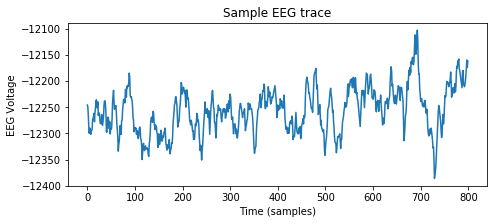

In [235]:
#Plot some example data
plt.figure(figsize=(7.5, 3)); ax=plt.subplot(111)
plt.plot(eeg.data[2, 2, :])
plt.ylabel('EEG Voltage'); plt.xlabel('Time (samples)')
plt.title('Sample EEG trace')

This is the fundamental unit of all of the analyses you'll do in the lab -- the EEG timeseries! Whether from scalp or intracranial, our core interest is understanding the properties of these timeseries relative to interesting behavioral or cognitive events. Typically, we understand EEG signals with **spectral decomposition**, which will be covered tomorrow.

**Exercise: Get EEG data for the first five word events from all (bipolar) electrodes placed in the temporal cortex, and plot it.**

### Referencing

Electrical potentials inherently reflect some kind of differential. In the case of EEG data, the voltage fluctuations we measure really reflect a difference between an electrode of interest and a "reference" electrode placed elsewhere (such as the mastoid or an arbitrary location in the brain). As such, noise on the reference electrode -- and other sources -- can contaminate our measurement of true neural signal in the raw data. 

To solve this, it is common to "re-reference" EEG data to mitigate sources of noise. We could have a whole discussion about different ways to re-reference data, and the advantages/disadvantages of each, but there are two common ways of re-referencing I'll mention here. 

The most common re-reference used in this lab is the **bipolar** reference, in which the signal from each channel is subtracted from its neighbor. The result is an estimate of a cleaner signal that putatively reflects activity at the midpoint of the two physical recording contacts (we sometimes call this midpoint a **virtual electrode**). The bipolar reference has several advantages: (1) it's very simple to implement, (2) it typically does a good job at removing widespread noise, and (3) it ensures that your re-referenced traces reflect activity that is very close to the original electrodes. 

(One downside is that bipolar re-referencing can actually reduce your ability to detect true neural signals, or mislocalize its origin, especially if two adjancent electrodes were detecting a common source of electrical activity.)

You may also encounter the **common average** reference, in which the average signal across all electrodes (or perhaps within a predefined anatomical region) is subtracted from each. This method is less likely to destroy local signals, and also does a good job removing widespread noise or reference noise, but can potentially contaminate originally-clean electrodes with unmitigated noise from a completely different part of the brain. 

Neither method is perfect, and there are more sophisiticated approaches out there. For the sake of this tutorial, we're going to focus on the bipolar reference. But it is often nice to try different referencing schemes in your analysis to ensure that your results don't change drastically from one to the other. 

<center>
<img src="http://www.bem.fi/book/13/fi/1303.gif">
</center>

/home1/esolo/anaconda3/envs/CML/lib/python3.6/site-packages/cmlreaders/path_finder.py:238: MultiplePathsFoundWarning: Multiple files found: /protocols/r1/subjects/R1001P/experiments/FR1/sessions/0/ephys/current_processed/sources.json
/data/eeg/R1001P/eeg.noreref/params.txt returning the first file found
  warnings.warn(msg, MultiplePathsFoundWarning)


Text(0.5,1,'Database bipolar')

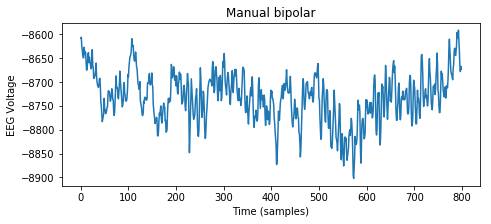

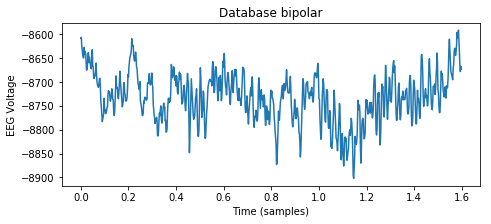

In [136]:
%matplotlib inline
import pylab as plt
import numpy as np

#Let's take a look at how bipolar referencing actually works
eeg1 = reader.load_eeg(events=word_evs[0:1], rel_start=0, rel_stop=1600, scheme=contacts[0:1])
eeg2 = reader.load_eeg(events=word_evs[0:1], rel_start=0, rel_stop=1600, scheme=contacts[1:2])
eeg_bipol = eeg1.data-eeg2.data

plt.figure(figsize=(7.5, 3)); ax=plt.subplot(111)
plt.plot(eeg_bipol[0, 0, :])
plt.ylabel('EEG Voltage'); plt.xlabel('Time (samples)')
plt.title('Manual bipolar')

#Does this match our database's bipolar data?
eeg = reader.load_eeg(events=word_evs[0:1], rel_start=0, rel_stop=1600, scheme=pairs[0:1])

#First, let's load a clip of EEG from one electrode. For that, we'll need to use our reader's 'load_eeg' method:
eeg = reader.load_eeg(events=word_evs[0:1], rel_start=0, rel_stop=1600, scheme=pairs[0:1])  #the reader requires slices, not single events

plt.figure(figsize=(7.5, 3)); ax=plt.subplot(111)
plt.plot(np.arange(eeg.shape[2])/float(eeg.samplerate), eeg.data[0, 0, :])
plt.ylabel('EEG Voltage'); plt.xlabel('Time (samples)')
plt.title('Database bipolar')

## Check out some ERPs
To carry out an ERP analysis on the voltage data, we must 1. Load the desired events, 2. Filter to only encoding
events, 3. Get the voltage for all encoding events, 4. Z-Score the voltage, 5. Get a logical index of recall status, 6. Plot
the average subsequently recalled and subsequently forgotten voltage traces.

/home1/esolo/anaconda3/envs/CML/lib/python3.6/site-packages/cmlreaders/path_finder.py:238: MultiplePathsFoundWarning: Multiple files found: /protocols/r1/subjects/R1001P/experiments/FR1/sessions/0/ephys/current_processed/sources.json
/data/eeg/R1001P/eeg.noreref/params.txt returning the first file found
  warnings.warn(msg, MultiplePathsFoundWarning)


Text(0,0.5,'Z-scored Voltage')

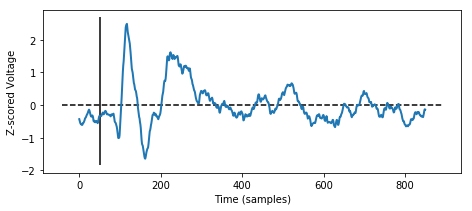

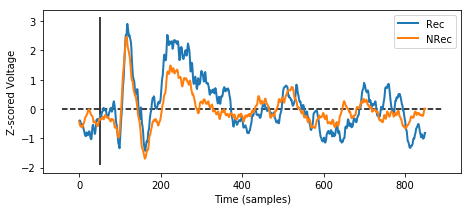

In [258]:
#Load the EEG for encoding events
eeg = reader.load_eeg(events=word_evs, rel_start=-100, rel_stop=1600, scheme=pairs[18:19])  #this is an occipital electrode

#Get recalled/not recalled status
rec_status = word_evs['recalled']

mu = np.mean(np.mean(eeg.data[:, 0, :], 1), 0)
std_ = np.std(np.mean(eeg.data[:, 0, :], 1), 0)

zeeg = (eeg.data-mu)/std_

#Plot the trace averaged across all events
plt.figure(figsize=(7.5, 3)); ax=plt.subplot(111)
plt.plot(np.mean(zeeg[:, 0, :], 0), linewidth=2,)
plt.vlines([0.1*sr], ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], linestyle='-', color='k')
plt.hlines([0], xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], linestyle='--', color='k')
plt.xlabel('Time (samples)'); plt.ylabel('Z-scored Voltage')

#Plot the trace for rec/nrec separately
plt.figure(figsize=(7.5, 3)); ax=plt.subplot(111)
plt.plot(np.mean(zeeg[rec_status, 0, :], 0), linewidth=2, label='Rec')
plt.plot(np.mean(zeeg[~rec_status, 0, :], 0), linewidth=2, label='NRec')
plt.vlines([0.1*sr], ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], linestyle='-', color='k')
plt.hlines([0], xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], linestyle='--', color='k')
plt.legend()
plt.xlabel('Time (samples)'); plt.ylabel('Z-scored Voltage')

**Exercise: Plot the ERP from a lateral occipital electrode using the common average reference instead of the bipolar. How does it differ?**

**Exercise: Plot the ERP in a 2-second span surrounding the recall of each word event. Does our occipital electrode show an effect? What about elsewhere in the brain?**

## Time-Frequency Decomposition

Now we know how to load event data, electrode data, and EEG data. We're finally ready to start looking at some electrophysiology!

Besides ERPs, the primary way neuroscientists understand EEG signals is to look for oscillations, or rhythmic fluctations in the voltage of an EEG signal. Some fluctuations occur very fast, cycling dozens of times in the span of a second, while others will see only 3 or 4 cycles a second. Breaking down EEG according to the contributions of oscillations at various frequencies is key to electrophysiological analysis. 

There are many ways to break down an EEG signal into its component frequencies and measure the contribution of each. In class, we'll switch gears to a short presentation on the Fourier Transform and time-frequency analysis ( https://github.com/pennmem/PythonBootcamp2018/blob/master/time_freq_analysis.pdf ). Don't worry if you don't get everything right away -- this is really meant to convey the big-picture ideas. 

<center>
<img src="http://neurosky.com/wp-content/uploads/2015/05/Screen-Shot-2015-05-14-at-10.41.17-AM.png" width=300>
</center>

Here's a few tips to keep in mind as you're analyzing spectral power in EEG signals: 

* We're often interested in **contrasts between conditions**, e.g. rememebered vs. not-remembered, or stimulus vs. baseline, etc. Interpreting raw power values can be difficult and should be done with care. 
* Many filters, like the Morlet wavelet, induce edge effects. Be sure to add an appropriately-sized **buffer** and remove it after filtering!
* **Line noise** and harmonics (60 Hz, 120 Hz) can contaminate analyses of high-frequency activity. Re-referencing can mitigate it somewhat, but either avoid analyzing frequencies around 60 and 120 Hz or apply a notch filter to remove residual line noise. 
* **Nyquist limit**: The maximum frequency that can be resolved is equal to the sampling rate divided by two (F_s/2). Subjects are often sampled at 500 Hz or 1000 Hz, corresponding to maximum resolved frequencies of 250 Hz or 500 Hz. In practice, try not to get too close to the limit anyway. This is typically not an issue for any recent subjects, since our maximum frequency of interest is rarely >200 Hz or so.
* **Bandwidth**: The lowest frequency that can be resolved in a timeseries, equal to 1/T, where T is the duration of the available time window. (Same as the smallest-possible frequency spacing.)
* There is a **fundamental trade-off** between time resolution and frequency resolution. With greater frequency resolution comes worse time resolution, and vice versa. So resolving frequencies within ~1 Hz of each other, like in the theta range, is possible, but you will not be able to make judgments about the timing of effects beyond ~1 second. Try to use time windows that contain at least **3 cycles** of your lowest frequency of interest. 

<center>
<img src="https://github.com/esolomon/PythonBootcamp2019/blob/master/figures/nyquist.png?raw=true" width=700>
</center>

## Implementing time-frequency analyses in Python

There are several Python toolboxes that have good implementations of various spectral decomposition methods. For the sake of the bootcamp, we're going to focus on two popular choices in the lab: MNE and PTSA (Python Time Series Analysis). 

* **MNE Python** is a suite of tools for analysis of neurophysiologic timeseries data. It's especially useful for EEG, but still has incredible functionality for ECoG/iEEG, which we're focusing on here. (https://martinos.org/mne/stable/index.html)

* **PTSA** is another Python-based timeseries toolbox, designed by former members of the CML. It doesnt' have nearly the breadth of MNE, but does feature a very fast implementation of the Morlet Wavelet Transform. (https://github.com/pennmem/ptsa_new)

Which toolbox you choose to use for your analyses is ultimately up to you. However, note that MNE is a well-documented and well-curated software suite with active professional backing, while PTSA is more of a home-grown approach to specific timeseries functionality. You may find that MNE's flexibility, and the wide variety of spectral analyses it supports, make it a better choice for most things.

### MNE Python
Let's take a look at doing some basic spectral analyses with MNE! First, we'll load up the same dataset we've been working with the past few days. 

In [1]:
#First, our import statements
from cmlreaders import CMLReader, get_data_index

#The "r1" database corresponds to all of the RAM subjects
df = get_data_index("r1")

#Specify which subject and experiment we want
sub = 'R1001P'
exp = 'FR1'

#Find out the sessions, localization, and montage for this subject
sessions = list(df[(df['subject']==sub) & (df['experiment']==exp)]['session'])
mont = int(df[(df['subject']==sub) & (df['experiment']==exp)].iloc()[0]['montage'])      #note that *usually* mont and loc will be 0.
loc = int(df[(df['subject']==sub) & (df['experiment']==exp)].iloc()[0]['localization'])

#For first session...
reader = CMLReader(sub, exp, sessions[0], montage=mont, localization=loc)   #reader for loading CML data
evs = reader.load('task_events')
word_evs = evs[evs['type']=='WORD']
pairs = reader.load('pairs')

In [2]:
#Grab EEG for all events from the 70th electrode
eeg_cml = reader.load_eeg(events=word_evs, rel_start=0, rel_stop=1000, scheme=pairs[70:71])

/home1/esolo/anaconda3/envs/CML/lib/python3.6/site-packages/cmlreaders/path_finder.py:238: MultiplePathsFoundWarning: Multiple files found: /protocols/r1/subjects/R1001P/experiments/FR1/sessions/0/ephys/current_processed/sources.json
/data/eeg/R1001P/eeg.noreref/params.txt returning the first file found
  warnings.warn(msg, MultiplePathsFoundWarning)


First, we'll need to convert our CMLReaders data into an MNE format. Fortunately, this has been made ridiculously simple:

In [3]:
import mne
eeg = eeg_cml.to_mne()

The basis of MNE is the **EpochsArray** structure. It's a Python object that nicely wraps up pertinent information about an EEG-type timeseries, including channel names, sample rates, and event information. Note how our eeg object has information about events and time, among others. It also supports more advanced functionality like filtering, re-referencing, and channel rejection, which we won't get in to right now.

**(Tip: MNE functions can often take raw numpy arrays just as well as an EpochsArray -- just be sure you've got the array dimensions right!)**

In [4]:
eeg?

Type:        EpochsArray
String form:
<EpochsArray  |   300 events (all good), 0 - 0.998 sec, baseline off, ~1.2 MB, data loaded,
 '1': 300>
Length:      300
File:        ~/anaconda3/envs/CML/lib/python3.6/site-packages/mne/epochs.py
Docstring:  
Epochs object from numpy array.

Parameters
----------
data : array, shape (n_epochs, n_channels, n_times)
    The channels' time series for each epoch. See notes for proper units of
    measure.
info : instance of Info
    Info dictionary. Consider using ``create_info`` to populate
    this structure.
events : None | array of int, shape (n_events, 3)
    The events typically returned by the read_events function.
    If some events don't match the events of interest as specified
    by event_id, they will be marked as 'IGNORED' in the drop log.
    If None (default), all event values are set to 1 and event time-samples
    are set to range(n_epochs).
tmin : float
    Start time before event. If nothing provided, defaults to 0.
event_id : int |

In [5]:
#Use this opportunity to tab-complete eeg's attributes.
eeg.info['sfreq']

500.0

In [6]:
#Let's take a look at the average power spectrum across these events (Welch's method)
from mne import time_frequency

psds, freqs = time_frequency.psd_welch(eeg, fmin=3, fmax=150)  #the output is size (events x channels x freqs)

Effective window size : 0.512 (s)


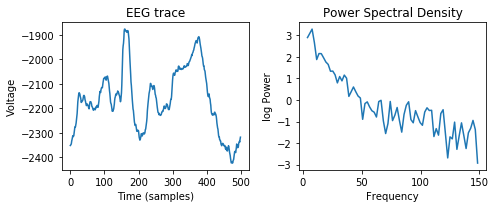

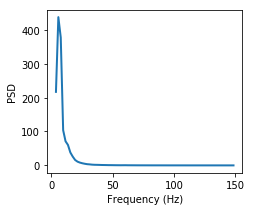

In [7]:
#Plot our results
%matplotlib inline
from pylab import *

#Plot individual trial example
figure(figsize=(7, 3)); ax=subplot(121);
plot(eeg.get_data()[10, 0, :]);
title('EEG trace'); xlabel('Time (samples)'); ylabel('Voltage')
ax=subplot(122);
plot(freqs, np.log10(psds[10, 0, :]))
title('Power Spectral Density'); xlabel('Frequency'); ylabel('log Power');
tight_layout()

figure(figsize=(3.5, 3)); ax=subplot(111)
plot(freqs, np.mean(psds[:, 0, :], 0), linewidth=2)
ylabel('PSD'); xlabel('Frequency (Hz)');

Note how the power at high frequencies is significantly smaller than at low frequencies. This is a classic relationship found in many natural signals, called the **"1/f"** phenomenon. It means that the amplitude of high-frequency signals tends to be much smaller than the amplitude of low-frequency signals. 

Unfortunately, this relationship makes it difficult to visualize changes at high frequencies, or properly assess differences between frequency bands. This is why we almost always take the log of power values before going forward with our analyses. 

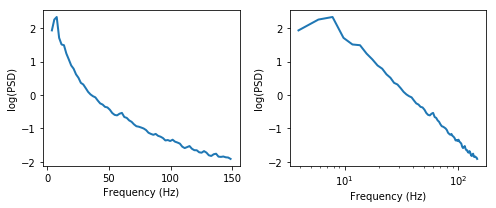

In [273]:
log_psds = np.log10(psds)

figure(figsize=(7, 3)); ax=subplot(121)
plot(freqs, np.mean(log_psds[:, 0, :], 0), linewidth=2)
ylabel('log(PSD)'); xlabel('Frequency (Hz)');

#Plot on a log axis to better see low frequencies
ax=subplot(122)
semilogx(freqs, np.mean(log_psds[:, 0, :], 0), linewidth=2)
ylabel('log(PSD)'); xlabel('Frequency (Hz)');

tight_layout()  #This cleans up our plots a bit

That's much better! We can definitely see more things going on at all points throughout our frequency range. Note that there are several other ways to normalize power values -- some of which we will discuss -- than can also be applied after an initial log transform.

**Exercise: Analyze 3 seconds of the power sectrum of the first channel. What do you notice?**

Effective window size : 0.512 (s)


/home1/esolo/anaconda3/envs/CML/lib/python3.6/site-packages/cmlreaders/path_finder.py:238: MultiplePathsFoundWarning: Multiple files found: /protocols/r1/subjects/R1001P/experiments/FR1/sessions/0/ephys/current_processed/sources.json
/data/eeg/R1001P/eeg.noreref/params.txt returning the first file found
  warnings.warn(msg, MultiplePathsFoundWarning)


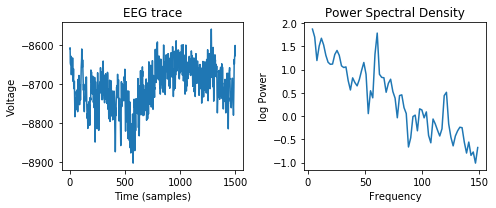

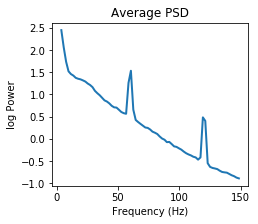

In [431]:
eeg_cml = reader.load_eeg(events=word_evs, rel_start=0, rel_stop=3000, scheme=pairs[0:1])
eeg = eeg_cml.to_mne()

#Get power spectral densities
psds, freqs = time_frequency.psd_welch(eeg, fmin=3, fmax=150)  #the output is size (events x channels x freqs)

#Plot individual trial example
figure(figsize=(7, 3)); ax=subplot(121);
plot(eeg.get_data()[0, 0, :]);
title('EEG trace'); xlabel('Time (samples)'); ylabel('Voltage')
ax=subplot(122);
plot(freqs, np.log10(psds[0, 0, :]))
title('Power Spectral Density'); xlabel('Frequency'); ylabel('log Power');
tight_layout()

#Plot average PSD over all trials
figure(figsize=(3.5, 3)); ax=subplot(111)
plot(freqs, np.log10(np.mean(psds[:, 0, :], 0)), linewidth=2)
title('Average PSD'); xlabel('Frequency (Hz)'); ylabel('log Power');

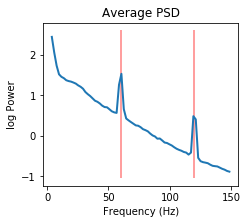

In [429]:
#Where's the line noise?
figure(figsize=(3.5, 3)); ax=subplot(111)
plot(freqs, np.log10(np.mean(psds[:, 0, :], 0)), linewidth=2)
title('Average PSD'); xlabel('Frequency (Hz)'); ylabel('log Power')
vlines([60, 120], ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], color='red', alpha=0.5)

Setting up band-stop filter from 58 - 62 Hz
Setting up band-stop filter from 1.2e+02 - 1.2e+02 Hz
Effective window size : 0.512 (s)


Text(0.5,1,'Notch Filtered Data')

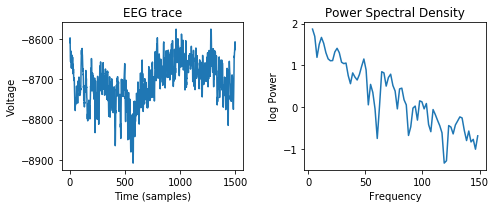

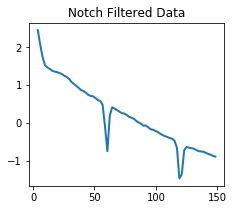

In [432]:
#Here's a potential solution -- filtering out the 60 Hz electrical line noise and its harmonic at 120 Hz

#Butterworth filtering: 60 Hz and 120 Hz
filt_data = eeg.filter(l_freq=62., h_freq=58., method='iir')
filt_data = filt_data.filter(l_freq=122., h_freq=118., method='iir')

#Get power spectral densities
psds, freqs = time_frequency.psd_welch(filt_data, fmin=3, fmax=150)  #the output is size (events x channels x freqs)

#Plot individual trial example
figure(figsize=(7, 3)); ax=subplot(121);
plot(filt_data.get_data()[0, 0, :]);
title('EEG trace'); xlabel('Time (samples)'); ylabel('Voltage')
ax=subplot(122);
plot(freqs, np.log10(psds[0, 0, :]))
title('Power Spectral Density'); xlabel('Frequency'); ylabel('log Power')
tight_layout()

#Plot average PSD
figure(figsize=(3.5, 3)); ax=subplot(111)
plot(freqs, np.log10(np.mean(psds[:, 0, :], 0)), linewidth=2)
title('Notch Filtered Data')

Effective window size : 0.512 (s)


Text(0.5,1,'Notch Filtered Data')

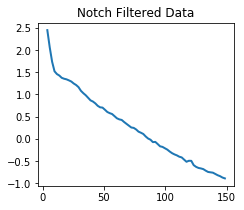

In [310]:
#spectrum_fit method
filt_data = mne.filter.notch_filter(eeg.get_data(), Fs=500., freqs=[60, 120], method='spectrum_fit')

#Get power spectral densities
psds, freqs = time_frequency.psd_array_welch(filt_data, sfreq=500., fmin=3, fmax=150)  #the output is size (events x channels x freqs)

figure(figsize=(3.5, 3)); ax=subplot(111)
plot(freqs, np.log10(np.mean(psds[:, 0, :], 0)), linewidth=2)
title('Notch Filtered Data')

**Exercise: Compare the power spectra for channel 31 between remembered and not-remembered items. Do you notice any differences?**

Effective window size : 0.512 (s)
Effective window size : 0.512 (s)


/home1/esolo/anaconda3/envs/CML/lib/python3.6/site-packages/cmlreaders/path_finder.py:238: MultiplePathsFoundWarning: Multiple files found: /protocols/r1/subjects/R1001P/experiments/FR1/sessions/0/ephys/current_processed/sources.json
/data/eeg/R1001P/eeg.noreref/params.txt returning the first file found
  warnings.warn(msg, MultiplePathsFoundWarning)


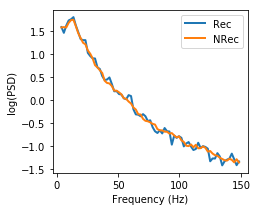

### Wavelet transform 
The wavelet transform is a powerful spectral decomposition method, since it explicitly lets us changes in the power spectrum over time. However, because this method involves convolving wavelets with our timeseries, we need to be sure to add buffers to either end of the signal (which we can clip off later). Otherwise, we'll end up eith edge effects that contaminate our results.

/home1/esolo/anaconda3/envs/CML/lib/python3.6/site-packages/cmlreaders/path_finder.py:238: MultiplePathsFoundWarning: Multiple files found: /protocols/r1/subjects/R1001P/experiments/FR1/sessions/0/ephys/current_processed/sources.json
/data/eeg/R1001P/eeg.noreref/params.txt returning the first file found
  warnings.warn(msg, MultiplePathsFoundWarning)


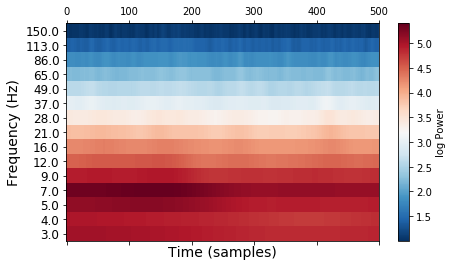

In [382]:
##### Load EEG
buf = 1000  #define the buffer (in ms) here. Should be at least half the total wavelet length at lowest frequency (i.e. 1/2f * n_cycles). With standard params, 1 sec usually suffices. 
sr = eeg_cml.samplerate #we'll need this soon
eeg = reader.load_eeg(events=word_evs, rel_start=-1*buf, rel_stop=1000+buf, scheme=pairs[70:71]).to_mne()

#Pre-define an array of frequencies. We can log-space them since wavelets are less sensitive to differences at higher frequencies
myfreqs = np.logspace(np.log10(3), np.log10(150), num=15)

#Run TF decomposition
power = time_frequency.tfr_morlet(eeg, freqs=myfreqs, n_cycles=5, return_itc=False, average=True) #we're setting it to automatically average across trials

#Plot results
figure(figsize=(7., 4)); ax=subplot(111)
matshow(np.log10(power.data[0, :, int(buf/1000.*sr):-1*int(buf/1000.*sr)]), fignum=0, aspect='auto', cmap='RdBu_r');  #we're cutting off the buffers manually here
ax.invert_yaxis()
yticks(np.arange(0, len(myfreqs)), np.round(myfreqs), fontsize=12)
xlabel('Time (samples)', fontsize=14); ylabel('Frequency (Hz)', fontsize=14)
cb = colorbar(); cb.set_label('log Power',)

This is nice, but we're not seeing much interesting activity because our color scale is still getting squished by the difference between low and high frequency power (despite our log transform). What if we just look at low frequencies?

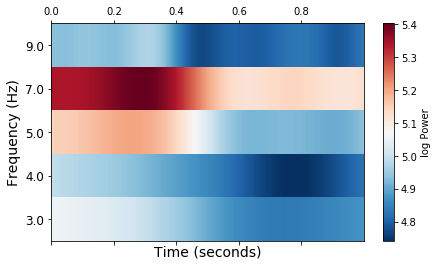

In [380]:
#Plot results
figure(figsize=(7., 4)); ax=subplot(111)
to_plot = power.data[0, 0:5, 500:-500]
matshow(np.log10(to_plot), fignum=0, aspect='auto', cmap='RdBu_r');  #we're cutting off the buffers manually here
ax.invert_yaxis()
yticks(np.arange(0, len(myfreqs[0:5])), np.round(myfreqs[0:5]), fontsize=12)
xticks(np.arange(0, to_plot.shape[1])[::100], np.arange(0, to_plot.shape[1])[::100]/500.)
xlabel('Time (seconds)', fontsize=14); ylabel('Frequency (Hz)', fontsize=14)
cb = colorbar(); cb.set_label('log Power',)

Cool! looks like there's an increase in 7 Hz power shortly after word onset which dies out after a few hundred milliseconds.

But what we *really* want to do is find the difference in power between rememebered and not-remembered trials, in order to isolate the neural activity specific to good episodic memory. Come back tomorrow to see how that's done!

**Exercise: Try a different number of wavelet cycles. What happens to the 7 Hz effect?**

**Exercise: Play around with the number of wavelet cycles, frequency, and buffer sizes. What happens as you adjust these parameters?**

## PTSA

PTSA is similar to MNE in its mission: To provide a general framework for timeseries analyses. While PTSA has much less institutional muscle behind it, it has a highly efficient implementation of the Morlet Wavelet Transform and the Butterworth Filter.

The core of PTSA is the **TimeSeriesX object**, which is an elaborated form of the numpy recarray. In particular, the TimeSeriesX object enables users to keep track of dimension metadata even after filtering or transforming the data within the object. For example, TimeSeriesX objects in PTSA nicely wrap together EEG data or power data with event information. Let's take a look:

In [279]:
#We need our data in the PTSA TimeseriesX format
buf = 1000
eeg_ptsa = reader.load_eeg(events=word_evs, rel_start=-1*buf, rel_stop=1000+buf, scheme=pairs[70:71]).to_ptsa()
eeg_ptsa

/home1/esolo/anaconda3/envs/CML/lib/python3.6/site-packages/cmlreaders/path_finder.py:238: MultiplePathsFoundWarning: Multiple files found: /protocols/r1/subjects/R1001P/experiments/FR1/sessions/0/ephys/current_processed/sources.json
/data/eeg/R1001P/eeg.noreref/params.txt returning the first file found
  warnings.warn(msg, MultiplePathsFoundWarning)


<xarray.TimeSeries (event: 300, channel: 1, time: 1500)>
array([[[-2178, -2178, ..., -2280, -2283]],

       [[-2193, -2199, ..., -2177, -2181]],

       ...,

       [[-2164, -2165, ..., -2124, -2121]],

       [[-2190, -2186, ..., -2193, -2195]]], dtype=int16)
Coordinates:
  * event       (event) (numpy.record, [('index', '<i8'), ('eegfile', 'O'), ('eegoffset', '<i8'), ('exp_version', '<f8'), ('experiment', 'O'), ('intrusion', '<i8'), ('is_stim', '?'), ('item_name', 'O'), ('item_num', '<i8'), ('list', '<i8'), ('montage', '<i8'), ('msoffset', '<i8'), ('mstime', '<i8'), ('protocol', 'O'), ('recalled', '?'), ('rectime', '<i8'), ('serialpos', '<i8'), ('session', '<i8'), ('stim_list', '?'), ('stim_params', 'O'), ('subject', 'O'), ('type', 'O')]) (23, '/protocols/r1/subjects/R1001P/experiments/FR1/sessions/0/ephys/current_processed/noreref/R1001P_FR1_0_12Oct14_1034', 388959, 1.02, 'FR1', -999, False, 'HOUSE', 130, 1, 0, 1, 1413125314490, 'r1', False, -999, 1, 0, False, list([]), 'R1001P', 

In [280]:
#We can access the original event information as follows: 
eeg_ptsa.event.data['item_name'][0:5]

array(['HOUSE', 'HAWK', 'WAND', 'GEESE', 'STAR'], dtype=object)

In [281]:
#And we can index our EEG data by information from the events structure!
eeg_rec = eeg_ptsa[eeg_ptsa.event.data['recalled']==1]
eeg_rec.shape

(53, 1, 1500)

(Note that MNE EpochsArray also supports events metadata, but the current implementation in CMLReaders discards events information.)

In [282]:
#TimeSeriesX objects also support handy manipulations of the array structure, e.g.
eeg_ptsa_alt = eeg_ptsa.transpose('channel', 'event', 'time')
eeg_ptsa_alt.shape

(1, 300, 1500)

### Spectral Analysis

In [305]:
from ptsa.data.filters import ButterworthFilter

#Filter out line noise
freq_range = [58., 62.]
b_filter = ButterworthFilter(timeseries=eeg_ptsa, freq_range=freq_range, filt_type='stop', order=4)
eeg_filtered = b_filter.filter()

In [284]:
from ptsa.data.filters import MorletWaveletFilter

#Get spectral power
myfreqs = np.logspace(np.log10(3), np.log10(150), 15)  #let's start with 3-170 Hz, 20 frequencies
wf = MorletWaveletFilter(timeseries=eeg_filtered, freqs=myfreqs, width=5, output='power')
pow_wavelet = wf.filter()  #output is freqs, events, elecs, and time
pows = pow_wavelet.data[:, :, :, int((buf/1000.)*sr):-1*int((buf/1000.)*sr)]  #remove buffer period
pows = np.log10(pows)   #take log of powers

CPP total time wavelet loop:  0.17738032341003418


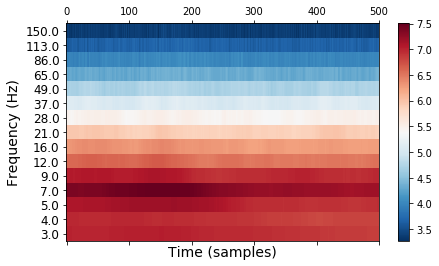

In [285]:
#Plot results
figure(figsize=(7., 4)); ax=subplot(111)
matshow(np.mean(pows[:, :, 0, :], 1), fignum=0, aspect='auto', cmap='RdBu_r');  #we're cutting off the buffers manually here
ax.invert_yaxis()
yticks(np.arange(0, len(myfreqs)), np.round(myfreqs), fontsize=12)
xlabel('Time (samples)', fontsize=14); ylabel('Frequency (Hz)', fontsize=14)
colorbar();

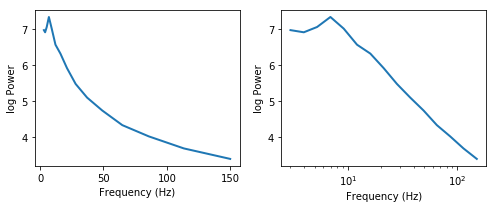

In [287]:
#look at the average spectrum, and compare to our earlier results
figure(figsize=(7, 3)); ax=subplot(121)
plot(myfreqs, np.mean(np.mean(pows[:, :, 0, :], 1), 1), linewidth=2)
ylabel('log Power'); xlabel('Frequency (Hz)')

#Plot on a log axis to better see differences at low frequencies
ax=subplot(122)
semilogx(myfreqs, np.mean(np.mean(pows[:, :, 0, :], 1), 1), linewidth=2)
ylabel('log Power'); xlabel('Frequency (Hz)')

tight_layout()

**Exercise: Compute the average time-frequency plot across all temporal cortex electrodes in subject R1111M**